<a href="https://colab.research.google.com/github/Nishtha13/Packet-to-Prediction/blob/main/Final_code_Disturbed_Sleep_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/distSleepDay3 With decimal.csv')
df2 = pd.read_csv('/content/normalSleepDay2 with decimals.csv')

df = pd.concat([df1, df2], ignore_index=True)

# Display the concatenated DataFrame
print(df)

          timestamp Source MAC address  event subtype  RSSI  label
0      1.657742e+09  8e:5e:00:a4:0d:74             44   -39    NaN
1      1.657742e+09  8e:5e:00:a4:0d:74             44   -41    NaN
2      1.657742e+09  8e:5e:00:a4:0d:74             44   -37    NaN
3      1.657742e+09  8e:5e:00:a4:0d:74             44   -39    NaN
4      1.657742e+09  8e:5e:00:a4:0d:74             40   -35    NaN
...             ...                ...            ...   ...    ...
99575  1.657251e+09  8e:5e:00:a4:0d:74             40   -42  Sleep
99576  1.657251e+09  8e:5e:00:a4:0d:74             40     0  Sleep
99577  1.657251e+09  8e:5e:00:a4:0d:74             44   -39  Sleep
99578  1.657251e+09  8e:5e:00:a4:0d:74             44   -41  Sleep
99579  1.657251e+09  8e:5e:00:a4:0d:74             44   -41  Sleep

[99580 rows x 5 columns]


In [ ]:
df2

,timestamp,Source MAC address,event subtype,RSSI,label
0,1.657226e+09,8e:5e:00:a4:0d:74,44,-39,Sleep
1,1.657226e+09,8e:5e:00:a4:0d:74,44,-37,Sleep
2,1.657226e+09,8e:5e:00:a4:0d:74,44,-39,Sleep
3,1.657226e+09,8e:5e:00:a4:0d:74,44,-33,Sleep
4,1.657226e+09,8e:5e:00:a4:0d:74,44,-33,Sleep
...,...,...,...,...,...
14249,1.657251e+09,8e:5e:00:a4:0d:74,40,-42,Sleep
14250,1.657251e+09,8e:5e:00:a4:0d:74,40,0,Sleep
14251,1.657251e+09,8e:5e:00:a4:0d:74,44,-39,Sleep
14252,1.657251e+09,8e:5e:00:a4:0d:74,44,-41,Sleep


In [ ]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'], unit='s')
df2['timestamp'] = df2['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
df2

,timestamp,Source MAC address,event subtype,RSSI,label
0,2022-07-07 20:30:12,8e:5e:00:a4:0d:74,44,-39,Sleep
1,2022-07-07 20:30:33,8e:5e:00:a4:0d:74,44,-37,Sleep
2,2022-07-07 20:30:33,8e:5e:00:a4:0d:74,44,-39,Sleep
3,2022-07-07 20:30:53,8e:5e:00:a4:0d:74,44,-33,Sleep
4,2022-07-07 20:30:53,8e:5e:00:a4:0d:74,44,-33,Sleep
...,...,...,...,...,...
14249,2022-07-08 03:29:57,8e:5e:00:a4:0d:74,40,-42,Sleep
14250,2022-07-08 03:29:57,8e:5e:00:a4:0d:74,40,0,Sleep
14251,2022-07-08 03:29:57,8e:5e:00:a4:0d:74,44,-39,Sleep
14252,2022-07-08 03:30:05,8e:5e:00:a4:0d:74,44,-41,Sleep


In [ ]:
import pandas as pd

# Assuming your DataFrame is named "df"


# Sort the DataFrame by timestamp
df = df.sort_values('timestamp')

# Group the DataFrame by event subtype
grouped = df.groupby('event subtype')

# Create a new column to store the corr_diff values
df['corr_diff'] = pd.NaT

# Iterate over each group
for _, group in grouped:
    # Get the difference between the current timestamp and the previous timestamp
    diff = group['timestamp'].diff()
    diff.iloc[0] = 0


    # Update the corr_diff column with the computed differences
    df.loc[group.index, 'corr_diff'] = diff

# Print the updated DataFrame
df

,timestamp,Source MAC address,event subtype,RSSI,label,corr_diff
85326,1.657226e+09,8e:5e:00:a4:0d:74,44,-39,Sleep,0.0
85327,1.657226e+09,8e:5e:00:a4:0d:74,44,-37,Sleep,20.44854
85328,1.657226e+09,8e:5e:00:a4:0d:74,44,-39,Sleep,0.04256
85329,1.657226e+09,8e:5e:00:a4:0d:74,44,-33,Sleep,20.44823
85330,1.657226e+09,8e:5e:00:a4:0d:74,44,-33,Sleep,0.04221
...,...,...,...,...,...,...
85321,1.657772e+09,8e:5e:00:a4:0d:74,4,-39,NaN,0.18741
85322,1.657772e+09,8e:5e:00:a4:0d:74,4,-37,NaN,0.07939
85323,1.657772e+09,8e:5e:00:a4:0d:74,4,-37,NaN,0.02164
85324,1.657772e+09,8e:5e:00:a4:0d:74,4,-39,NaN,0.02855


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
df

,timestamp,Source MAC address,event subtype,RSSI,label,corr_diff
85326,2022-07-07 20:30:12,8e:5e:00:a4:0d:74,44,-39,Sleep,0.0
85327,2022-07-07 20:30:33,8e:5e:00:a4:0d:74,44,-37,Sleep,20.44854
85328,2022-07-07 20:30:33,8e:5e:00:a4:0d:74,44,-39,Sleep,0.04256
85329,2022-07-07 20:30:53,8e:5e:00:a4:0d:74,44,-33,Sleep,20.44823
85330,2022-07-07 20:30:53,8e:5e:00:a4:0d:74,44,-33,Sleep,0.04221
...,...,...,...,...,...,...
85321,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-39,NaN,0.18741
85322,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-37,NaN,0.07939
85323,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-37,NaN,0.02164
85324,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-39,NaN,0.02855


In [ ]:
import pandas as pd

# Assuming your DataFrame is named "df" and has the "timestamp" and "event subtype" columns

# Convert timestamp column to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the start and end timestamps for each hour interval
hour_intervals = [
    ("2022-07-13 19:59:41", "2022-07-13 20:59:41"),
    ("2022-07-13 20:59:42", "2022-07-13 21:59:41"),
    ("2022-07-13 21:59:42", "2022-07-13 22:59:41"),
    ("2022-07-13 22:59:42", "2022-07-13 23:59:41"),
    ("2022-07-13 23:59:42", "2022-07-14 00:59:41"),
    ("2022-07-14 00:59:42", "2022-07-14 01:59:41"),
    ("2022-07-14 01:59:42", "2022-07-14 02:59:41"),
    ("2022-07-14 02:59:42", "2022-07-14 04:21:17")
]

# Create an empty DataFrame to store the counts
counts_df = pd.DataFrame(columns=['hour', 'event_subtype', 'count'])

# Iterate over each hour interval
for start, end in hour_intervals:
    # Filter the DataFrame for the current hour interval
    hour_df = df[(df['timestamp'] >= start) & (df['timestamp'] <= end)]

    # Group the DataFrame by event subtype and calculate the count
    event_counts = hour_df['event subtype'].value_counts().reset_index()
    event_counts.columns = ['event_subtype', 'count']

    # Add the hour information to the event_counts DataFrame
    event_counts['hour'] = start

    # Append the counts to the counts_df DataFrame
    counts_df = counts_df.append(event_counts)

# Print the counts DataFrame
counts_df


<ipython-input-10-8638ad432b57>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_df = counts_df.append(event_counts)
<ipython-input-10-8638ad432b57>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_df = counts_df.append(event_counts)
<ipython-input-10-8638ad432b57>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_df = counts_df.append(event_counts)
<ipython-input-10-8638ad432b57>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts_df = counts_df.append(event_counts)
<ipython-input-10-8638ad432b57>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

,hour,event_subtype,count
0,2022-07-13 19:59:41,44,939
1,2022-07-13 19:59:41,40,228
2,2022-07-13 19:59:41,13,48
3,2022-07-13 19:59:41,4,25
4,2022-07-13 19:59:41,32,1
0,2022-07-13 20:59:42,40,32722
1,2022-07-13 20:59:42,36,5267
2,2022-07-13 20:59:42,44,4645
3,2022-07-13 20:59:42,32,686
4,2022-07-13 20:59:42,13,442


In [ ]:
new_df1 = df.copy()

new_df1['label'] = None

In [ ]:
new_df1['label'] = 'Unknown'

awake_range_1 = pd.date_range("2022-07-13 19:59:40", "2022-07-13 20:59:41", freq='S')
sleep_range_1 = pd.date_range("2022-07-13 20:59:42", "2022-07-13 21:59:41", freq='S')
awake_range_2 = pd.date_range("2022-07-13 21:59:42", "2022-07-13 22:59:41", freq='S')
sleep_range_2 = pd.date_range("2022-07-13 22:59:42", "2022-07-13 23:59:41", freq='S')
awake_range_3 = pd.date_range("2022-07-13 23:59:42", "2022-07-14 00:59:41", freq='S')
sleep_range_3 = pd.date_range("2022-07-14 00:59:42", "2022-07-14 01:59:41", freq='S')
awake_range_4 = pd.date_range("2022-07-14 01:59:42", "2022-07-14 02:59:42", freq='S')
sleep_range_4 = pd.date_range("2022-07-14 02:59:42", "2022-07-14 04:21:17", freq='S')

awake_range_5 = pd.date_range("2022-07-07 19:30:07", "2022-07-08 03:30:05", freq='S')

new_df1.loc[new_df1['timestamp'].isin(awake_range_1), 'label'] = 'Sleep'
new_df1.loc[new_df1['timestamp'].isin(sleep_range_1), 'label'] = 'Awake'
new_df1.loc[new_df1['timestamp'].isin(awake_range_2), 'label'] = 'Sleep'
new_df1.loc[new_df1['timestamp'].isin(sleep_range_2), 'label'] = 'Awake'
new_df1.loc[new_df1['timestamp'].isin(awake_range_3), 'label'] = 'Sleep'
new_df1.loc[new_df1['timestamp'].isin(sleep_range_3), 'label'] = 'Awake'
new_df1.loc[new_df1['timestamp'].isin(awake_range_4), 'label'] = 'Sleep'
new_df1.loc[new_df1['timestamp'].isin(sleep_range_4), 'label'] = 'Awake'
new_df1.loc[new_df1['timestamp'].isin(awake_range_5), 'label'] = 'Sleep'

new_df1

,timestamp,Source MAC address,event subtype,RSSI,label,corr_diff
85326,2022-07-07 20:30:12,8e:5e:00:a4:0d:74,44,-39,Sleep,0.0
85327,2022-07-07 20:30:33,8e:5e:00:a4:0d:74,44,-37,Sleep,20.44854
85328,2022-07-07 20:30:33,8e:5e:00:a4:0d:74,44,-39,Sleep,0.04256
85329,2022-07-07 20:30:53,8e:5e:00:a4:0d:74,44,-33,Sleep,20.44823
85330,2022-07-07 20:30:53,8e:5e:00:a4:0d:74,44,-33,Sleep,0.04221
...,...,...,...,...,...,...
85321,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-39,Awake,0.18741
85322,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-37,Awake,0.07939
85323,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-37,Awake,0.02164
85324,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-39,Awake,0.02855


In [ ]:
# output_file = '/content/DistSleepDay2Labeled.xlsx'
# new_df1.to_excel(output_file, index=False)

In [ ]:
unique_labels = new_df1['label'].unique()
print(unique_labels)


['Sleep' 'Awake']


In [ ]:
new_df1['label_ml'] = new_df1['label'].map({'Sleep': 0, 'Awake': 1})
new_df1

,timestamp,Source MAC address,event subtype,RSSI,label,corr_diff,label_ml
85326,2022-07-07 20:30:12,8e:5e:00:a4:0d:74,44,-39,Sleep,0.0,0
85327,2022-07-07 20:30:33,8e:5e:00:a4:0d:74,44,-37,Sleep,20.44854,0
85328,2022-07-07 20:30:33,8e:5e:00:a4:0d:74,44,-39,Sleep,0.04256,0
85329,2022-07-07 20:30:53,8e:5e:00:a4:0d:74,44,-33,Sleep,20.44823,0
85330,2022-07-07 20:30:53,8e:5e:00:a4:0d:74,44,-33,Sleep,0.04221,0
...,...,...,...,...,...,...,...
85321,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-39,Awake,0.18741,1
85322,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-37,Awake,0.07939,1
85323,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-37,Awake,0.02164,1
85324,2022-07-14 04:21:16,8e:5e:00:a4:0d:74,4,-39,Awake,0.02855,1


In [ ]:
unique_labels = new_df1['label_ml'].value_counts()
print(unique_labels)


1    79978
0    19602
Name: label_ml, dtype: int64


In [ ]:
new_df1.corr(method="pearson")

<ipython-input-17-45d6aad4f4d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df1.corr(method="pearson")


,event subtype,RSSI,label_ml
event subtype,1.000000,0.046503,-0.122341
RSSI,0.046503,1.000000,0.085248
label_ml,-0.122341,0.085248,1.000000


In [ ]:
X = new_df1.drop(['label_ml','timestamp','label','Source MAC address','RSSI'],axis=1)
Y = new_df1['label_ml']
new_df1 = new_df1.drop(['timestamp','label','Source MAC address','RSSI'],axis=1)

# New section

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#Apply undersampling to the training set
# undersampler = RandomUnderSampler()
# X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train, Y_train)

# # Count the classes after undersampling
# class_counts = Counter(Y_train_resampled)
# print("Class Counts after Undersampling:")
# for class_label, count in class_counts.items():
#     print(f"Class {class_label}: {count} samples")

# X_train = X_train_resampled
# Y_train = Y_train_resampled

# X_test = X_train
# Y_test = Y_train

In [ ]:
Y

85326    0
85327    0
85328    0
85329    0
85330    0
        ..
85321    1
85322    1
85323    1
85324    1
85325    1
Name: label_ml, Length: 99580, dtype: int64

In [ ]:
# from sklearn.model_selection import train_test_split
# from imblearn.under_sampling import RandomUnderSampler
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# fd = scaler.fit_transform(new_df1)
# fd = pd.DataFrame(fd)
# X_train = scaler.fit_transform(X_train)
# Y_test = Y_train
# X_test = X_train

# X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from  imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import  precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import RadiusNeighborsClassifier

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [ ]:
steps = [('over', SMOTE()), ('model', KNeighborsClassifier())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train,Y_train)

# scores = cross_val_score(pipeline, X, Y, cv=10, scoring='accuracy')
# print(scores)
# # print the mean and standard deviation of the scores
# print(f'Mean accuracy: {scores.mean():.3f}')
# print(f'Standard deviation: {scores.std():.3f}')

# from imblearn.under_sampling import RandomUnderSampler
# steps = [('under', RandomUnderSampler()), ('model',KNeighborsClassifier())]
# pipeline = Pipeline(steps)
# pipeline.fit(X_train, Y_train)
# y_pred = pipeline.predict(X_test)

Pipeline(steps=[('over', SMOTE()), ('model', KNeighborsClassifier())])

In [ ]:
predict = pipeline.predict(X_test)
predict

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
classification_report_result = classification_report(Y_test,predict)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.28      0.86      0.43      3864
           1       0.93      0.48      0.63     16052

    accuracy                           0.55     19916
   macro avg       0.61      0.67      0.53     19916
weighted avg       0.81      0.55      0.59     19916



In [ ]:
#DistSleepDay3 and NormalSleepDay2 (using the same dataset as training)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_csv('/content/1st Hout.csv')
dfh2 = pd.read_csv('/content/2nd Hour.csv')
dfh3 = pd.read_csv('/content/3rd.csv')
dfh4 = pd.read_csv('/content/4th hour.csv')
dfh5 = pd.read_csv('/content/5th.csv')
dfh6 = pd.read_csv('/content/6th hour.csv')
dfh7 = pd.read_csv('/content/7th Hour.csv')
dfh8 = pd.read_csv('/content/8th hour.csv')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()
dfh4 = dfh4[['event subtype', 'corr_diff']].dropna()
dfh5 = dfh5[['event subtype', 'corr_diff']].dropna()
dfh6 = dfh6[['event subtype', 'corr_diff']].dropna()
dfh7 = dfh7[['event subtype', 'corr_diff']].dropna()
dfh8 = dfh8[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3, dfh4, dfh5, dfh6, dfh7, dfh8]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)
    dfh['Predicted Value'] = y_pred

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

[0 1 0 1 1 1 1 1]


In [ ]:
#DistSleepDay2

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_excel('/content/dfh1sleepday1(1).xlsx')
dfh2 = pd.read_excel('/content/dfh2sleepday1(1).xlsx')
dfh3 = pd.read_excel('/content/dfh3sleepday1(1).xlsx')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2,dfh3]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

FileNotFoundError: ignored

In [ ]:
#Normal_Sleepday1

from sklearn.metrics import accuracy_score

y_pred = outputs_array
y_test = [0,0,0]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [ ]:
dfh1.head(10)

,event subtype,corr_diff,Predicted Value
0,44,0.00000,0
1,44,20.44854,0
2,44,0.04256,0
3,44,20.44823,0
4,44,0.04221,0
5,44,0.60647,1
6,13,0.00000,0
7,44,0.04189,0
8,44,2.27313,0
9,44,0.04196,0


In [ ]:
#DistSleepDay3 and NormalSleepDay2 (using the same dataset as training)

from sklearn.metrics import accuracy_score

y_pred = outputs_array
y_test = [0, 1, 0, 1, 0, 1, 0, 1]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.75


In [ ]:
#Normal_Sleep

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_csv('/content/126 to 226.csv')
dfh2 = pd.read_csv('/content/226 to 326.csv')
dfh3 = pd.read_csv('/content/326 to 410.csv')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)
# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

[0 0 1]
Class counts for prediction 0:
Class 0: 599
Class 1: 192

Class counts for prediction 0:
Class 0: 817
Class 1: 346

Class counts for prediction 1:
Class 0: 808
Class 1: 1464



In [ ]:
#Normal_Sleep

from sklearn.metrics import accuracy_score

y_pred = outputs_array
y_test = [0,0,0]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [ ]:
#DistSleepDay2

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_excel('/content/dfh1new.xlsx')
dfh2 = pd.read_excel('/content/dfh2new.xlsx')
dfh3 = pd.read_excel('/content/dfh3new.xlsx')
dfh4 = pd.read_excel('/content/dfh4new.xlsx')
dfh5 = pd.read_excel('/content/dfh5new.xlsx')
dfh6 = pd.read_excel('/content/dfh6new.xlsx')
dfh7 = pd.read_excel('/content/dfh7new.xlsx')
dfh8 = pd.read_excel('/content/dfh8new.xlsx')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()
dfh4 = dfh4[['event subtype', 'corr_diff']].dropna()
dfh5 = dfh5[['event subtype', 'corr_diff']].dropna()
dfh6 = dfh6[['event subtype', 'corr_diff']].dropna()
dfh7 = dfh7[['event subtype', 'corr_diff']].dropna()
dfh8 = dfh8[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3, dfh4, dfh5, dfh6, dfh7, dfh8]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

[1 1 1 1 1 1 1 1]
Class counts for prediction 1:
Class 0: 1484
Class 1: 2698

Class counts for prediction 1:
Class 0: 2952
Class 1: 6855

Class counts for prediction 1:
Class 0: 1152
Class 1: 2495

Class counts for prediction 1:
Class 0: 3288
Class 1: 18209

Class counts for prediction 1:
Class 0: 1142
Class 1: 2494

Class counts for prediction 1:
Class 0: 3031
Class 1: 17029

Class counts for prediction 1:
Class 0: 1606
Class 1: 2973

Class counts for prediction 1:
Class 0: 3470
Class 1: 22590



In [ ]:
#DistSleepDay2

from sklearn.metrics import accuracy_score

y_pred = outputs_array
y_test = [0, 1, 0, 1, 0, 1, 0, 1]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5


In [ ]:
steps = [('over', SMOTE()),('model',  RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train,Y_train)
# scores = cross_val_score(pipeline, X, Y, cv=10, scoring='accuracy')
# # print the mean and standard deviation of the scores
# print(f'Mean accuracy: {scores.mean():.3f}')
# print(f'Standard deviation: {scores.std():.3f}')

Pipeline(steps=[('over', SMOTE()), ('model', RandomForestClassifier())])

In [ ]:
predict = pipeline.predict(X_test)
predict

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
classification_report_result = classification_report(Y_test,predict)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.47      0.56      0.51      3887
           1       0.89      0.85      0.87     16029

    accuracy                           0.79     19916
   macro avg       0.68      0.70      0.69     19916
weighted avg       0.81      0.79      0.80     19916



# New section

In [ ]:
#DistSleepDay2

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_excel('/content/dfh1sleepday1(1).xlsx')
dfh2 = pd.read_excel('/content/dfh2sleepday1(1).xlsx')
dfh3 = pd.read_excel('/content/dfh3sleepday1(1).xlsx')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2,dfh3]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

[0 0 1]
Class counts for prediction 0:
Class 0: 1112
Class 1: 949

Class counts for prediction 0:
Class 0: 1240
Class 1: 1117

Class counts for prediction 1:
Class 0: 1824
Class 1: 2839



In [ ]:
#Normal_Sleepday2

from sklearn.metrics import accuracy_score

y_pred = outputs_array
y_test = [0,0,0]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [ ]:
#DistSleepDay3 and NormalSleepDay2 (using the same dataset as training)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_csv('/content/1st Hout.csv')
dfh2 = pd.read_csv('/content/2nd Hour.csv')
dfh3 = pd.read_csv('/content/3rd.csv')
dfh4 = pd.read_csv('/content/4th hour.csv')
dfh5 = pd.read_csv('/content/5th.csv')
dfh6 = pd.read_csv('/content/6th hour.csv')
dfh7 = pd.read_csv('/content/7th Hour.csv')
dfh8 = pd.read_csv('/content/8th hour.csv')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()
dfh4 = dfh4[['event subtype', 'corr_diff']].dropna()
dfh5 = dfh5[['event subtype', 'corr_diff']].dropna()
dfh6 = dfh6[['event subtype', 'corr_diff']].dropna()
dfh7 = dfh7[['event subtype', 'corr_diff']].dropna()
dfh8 = dfh8[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3, dfh4, dfh5, dfh6, dfh7, dfh8]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)
    dfh['Predicted Value'] = y_pred

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

[0 1 0 1 1 1 1 1]


In [ ]:
#DistSleepDay3 and NormalSleepDay2 (using the same dataset as training)

from sklearn.metrics import accuracy_score

y_pred = outputs_array
y_test = [0, 1, 0, 1, 0, 1, 0, 1]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.75


In [ ]:
#Normal_Sleep

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_csv('/content/126 to 226.csv')
dfh2 = pd.read_csv('/content/226 to 326.csv')
dfh3 = pd.read_csv('/content/326 to 410.csv')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)
# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

[0 0 1]
Class counts for prediction 0:
Class 0: 540
Class 1: 251

Class counts for prediction 0:
Class 0: 786
Class 1: 377

Class counts for prediction 1:
Class 0: 765
Class 1: 1507



In [ ]:
#Normal_Sleepday2

from sklearn.metrics import accuracy_score

y_pred = outputs_array
y_test = [0,0,0]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [ ]:
#DistSleepDay2

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_excel('/content/dfh1new.xlsx')
dfh2 = pd.read_excel('/content/dfh2new.xlsx')
dfh3 = pd.read_excel('/content/dfh3new.xlsx')
dfh4 = pd.read_excel('/content/dfh4new.xlsx')
dfh5 = pd.read_excel('/content/dfh5new.xlsx')
dfh6 = pd.read_excel('/content/dfh6new.xlsx')
dfh7 = pd.read_excel('/content/dfh7new.xlsx')
dfh8 = pd.read_excel('/content/dfh8new.xlsx')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()
dfh4 = dfh4[['event subtype', 'corr_diff']].dropna()
dfh5 = dfh5[['event subtype', 'corr_diff']].dropna()
dfh6 = dfh6[['event subtype', 'corr_diff']].dropna()
dfh7 = dfh7[['event subtype', 'corr_diff']].dropna()
dfh8 = dfh8[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3, dfh4, dfh5, dfh6, dfh7, dfh8]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

[1 1 1 1 1 1 1 1]
Class counts for prediction 1:
Class 0: 1493
Class 1: 2689

Class counts for prediction 1:
Class 0: 3261
Class 1: 6546

Class counts for prediction 1:
Class 0: 1168
Class 1: 2479

Class counts for prediction 1:
Class 0: 3573
Class 1: 17924

Class counts for prediction 1:
Class 0: 1152
Class 1: 2484

Class counts for prediction 1:
Class 0: 3199
Class 1: 16861

Class counts for prediction 1:
Class 0: 1655
Class 1: 2924

Class counts for prediction 1:
Class 0: 3737
Class 1: 22323



In [ ]:
#DistSleepDay2

from sklearn.metrics import accuracy_score

y_pred = outputs_array
y_test = [0, 1, 0, 1, 0, 1, 0, 1]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5


In [ ]:
steps = [('over', SMOTE()), ('model',SVC())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train,Y_train)

# scores = cross_val_score(pipeline, X, Y, cv=10, scoring='accuracy')
# # print the mean and standard deviation of the scores
# print(f'Mean accuracy: {scores.mean():.3f}')
# print(f'Standard deviation: {scores.std():.3f}')

# Make predictions on the testing data
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(Y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.3f}")

# Calculate and print the testing accuracy
test_accuracy = accuracy_score(Y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.3f}")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print the classification report
classification_report_result = classification_report(Y_train, y_pred_train)
print(classification_report_result)

classification_report_result = classification_report(Y_test, y_pred_test)
print(classification_report_result)

Training Accuracy: 0.828
Testing Accuracy: 0.829
              precision    recall  f1-score   support

           0       0.87      0.15      0.26     15715
           1       0.83      0.99      0.90     63949

    accuracy                           0.83     79664
   macro avg       0.85      0.57      0.58     79664
weighted avg       0.83      0.83      0.78     79664

              precision    recall  f1-score   support

           0       0.88      0.14      0.25      3887
           1       0.83      1.00      0.90     16029

    accuracy                           0.83     19916
   macro avg       0.85      0.57      0.58     19916
weighted avg       0.84      0.83      0.78     19916



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

steps = [('over', SMOTE()), ('model',  LogisticRegression())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train,Y_train)

# scores = cross_val_score(pipeline, X, Y, cv=10, scoring='accuracy')
# # print the mean and standard deviation of the scores
# print(f'Mean accuracy: {scores.mean():.3f}')
# print(f'Standard deviation: {scores.std():.3f}')

# Make predictions on the testing data
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(Y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.3f}")

# Calculate and print the testing accuracy
test_accuracy = accuracy_score(Y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.3f}")


# Print the classification report
classification_report_result = classification_report(Y_train, y_pred_train)
print(classification_report_result)

# Print the classification report
classification_report_result = classification_report(Y_test, y_pred_test)
print(classification_report_result)

Training Accuracy: 0.710
Testing Accuracy: 0.805
              precision    recall  f1-score   support

           0       0.81      0.54      0.65     15715
           1       0.66      0.88      0.75     15715

    accuracy                           0.71     31430
   macro avg       0.74      0.71      0.70     31430
weighted avg       0.74      0.71      0.70     31430

              precision    recall  f1-score   support

           0       0.50      0.53      0.52      3887
           1       0.88      0.87      0.88     16029

    accuracy                           0.81     19916
   macro avg       0.69      0.70      0.70     19916
weighted avg       0.81      0.81      0.81     19916



In [ ]:
#DistSleepDay2

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_excel('/content/dfh1new.xlsx')
dfh2 = pd.read_excel('/content/dfh2new.xlsx')
dfh3 = pd.read_excel('/content/dfh3new.xlsx')
dfh4 = pd.read_excel('/content/dfh4new.xlsx')
dfh5 = pd.read_excel('/content/dfh5new.xlsx')
dfh6 = pd.read_excel('/content/dfh6new.xlsx')
dfh7 = pd.read_excel('/content/dfh7new.xlsx')
dfh8 = pd.read_excel('/content/dfh8new.xlsx')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()
dfh4 = dfh4[['event subtype', 'corr_diff']].dropna()
dfh5 = dfh5[['event subtype', 'corr_diff']].dropna()
dfh6 = dfh6[['event subtype', 'corr_diff']].dropna()
dfh7 = dfh7[['event subtype', 'corr_diff']].dropna()
dfh8 = dfh8[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3, dfh4, dfh5, dfh6, dfh7, dfh8]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()#DistSleepDay2

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_excel('/content/dfh1new.xlsx')
dfh2 = pd.read_excel('/content/dfh2new.xlsx')
dfh3 = pd.read_excel('/content/dfh3new.xlsx')
dfh4 = pd.read_excel('/content/dfh4new.xlsx')
dfh5 = pd.read_excel('/content/dfh5new.xlsx')
dfh6 = pd.read_excel('/content/dfh6new.xlsx')
dfh7 = pd.read_excel('/content/dfh7new.xlsx')
dfh8 = pd.read_excel('/content/dfh8new.xlsx')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()
dfh4 = dfh4[['event subtype', 'corr_diff']].dropna()
dfh5 = dfh5[['event subtype', 'corr_diff']].dropna()
dfh6 = dfh6[['event subtype', 'corr_diff']].dropna()
dfh7 = dfh7[['event subtype', 'corr_diff']].dropna()
dfh8 = dfh8[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3, dfh4, dfh5, dfh6, dfh7, dfh8]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

[1 1 1 1 1 1 1 1]
Class counts for prediction 1:
Class 0: 1391
Class 1: 2791

Class counts for prediction 1:
Class 0: 2749
Class 1: 7058

Class counts for prediction 1:
Class 0: 1098
Class 1: 2549

Class counts for prediction 1:
Class 0: 3017
Class 1: 18480

Class counts for prediction 1:
Class 0: 1088
Class 1: 2548

Class counts for prediction 1:
Class 0: 2840
Class 1: 17220

Class counts for prediction 1:
Class 0: 1543
Class 1: 3036

Class counts for prediction 1:
Class 0: 3240
Class 1: 22820

[1 1 1 1 1 1 1 1]
Class counts for prediction 1:
Class 0: 1391
Class 1: 2791

Class counts for prediction 1:
Class 0: 2749
Class 1: 7058

Class counts for prediction 1:
Class 0: 1098
Class 1: 2549

Class counts for prediction 1:
Class 0: 3017
Class 1: 18480

Class counts for prediction 1:
Class 0: 1088
Class 1: 2548

Class counts for prediction 1:
Class 0: 2840
Class 1: 17220

Class counts for prediction 1:
Class 0: 1543
Class 1: 3036

Class counts for prediction 1:
Class 0: 3240
Class 1: 22820

In [ ]:
steps = [('over', SMOTE()), ('model', GradientBoostingClassifier())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train,Y_train)

# scores = cross_val_score(pipeline, X, Y, cv=10, scoring='accuracy')
# # print the mean and standard deviation of the scores
# print(f'Mean accuracy: {scores.mean():.3f}')
# print(f'Standard deviation: {scores.std():.3f}')

predict = pipeline.predict(X_test)
predict

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
classification_report_result = classification_report(Y_test,predict)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.54      0.55      0.55      3876
           1       0.89      0.88      0.89     16040

    accuracy                           0.82     19916
   macro avg       0.71      0.72      0.72     19916
weighted avg       0.82      0.82      0.82     19916



In [ ]:
#DistSleepDay2

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_excel('/content/dfh1new.xlsx')
dfh2 = pd.read_excel('/content/dfh2new.xlsx')
dfh3 = pd.read_excel('/content/dfh3new.xlsx')
dfh4 = pd.read_excel('/content/dfh4new.xlsx')
dfh5 = pd.read_excel('/content/dfh5new.xlsx')
dfh6 = pd.read_excel('/content/dfh6new.xlsx')
dfh7 = pd.read_excel('/content/dfh7new.xlsx')
dfh8 = pd.read_excel('/content/dfh8new.xlsx')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()
dfh4 = dfh4[['event subtype', 'corr_diff']].dropna()
dfh5 = dfh5[['event subtype', 'corr_diff']].dropna()
dfh6 = dfh6[['event subtype', 'corr_diff']].dropna()
dfh7 = dfh7[['event subtype', 'corr_diff']].dropna()
dfh8 = dfh8[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3, dfh4, dfh5, dfh6, dfh7, dfh8]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

[1 1 1 1 1 1 1 1]
Class counts for prediction 1:
Class 0: 1444
Class 1: 2738

Class counts for prediction 1:
Class 0: 2907
Class 1: 6900

Class counts for prediction 1:
Class 0: 1123
Class 1: 2524

Class counts for prediction 1:
Class 0: 3252
Class 1: 18245

Class counts for prediction 1:
Class 0: 1117
Class 1: 2519

Class counts for prediction 1:
Class 0: 2990
Class 1: 17070

Class counts for prediction 1:
Class 0: 1580
Class 1: 2999

Class counts for prediction 1:
Class 0: 3423
Class 1: 22637



In [ ]:
pipeline

Pipeline(steps=[('over', SMOTE()), ('model', GradientBoostingClassifier())])

In [ ]:
#Normalsleep1

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_excel('/content/dfh1sleepday1(1).xlsx')
dfh2 = pd.read_excel('/content/dfh2sleepday1(1).xlsx')
dfh3 = pd.read_excel('/content/dfh3sleepday1(1).xlsx')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2,dfh3]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = pipeline.predict(X_test)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

[0 0 1]
Class counts for prediction 0:
Class 0: 1252
Class 1: 809

Class counts for prediction 0:
Class 0: 1387
Class 1: 970

Class counts for prediction 1:
Class 0: 2015
Class 1: 2648



In [ ]:
#Normal_Sleepday1

from sklearn.metrics import accuracy_score

y_pred = outputs_array
y_test = [0,0,0]

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
X = new_df1[['event subtype', 'corr_diff']]
y = new_df1['label_ml']

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_shape = (X_train.shape[1],)  # Remove the extra dimension

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Apply normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = y_train.astype('int32')

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(X_train, y_train, validation_split=0.5, epochs=10)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(history.history.keys())

Epoch 1/10
1245/1245 [==============================] - 6s 4ms/step - loss: 0.5152 - acc: 0.8071 - val_loss: 0.4952 - val_acc: 0.7988
Epoch 2/10
1245/1245 [==============================] - 5s 4ms/step - loss: 0.4876 - acc: 0.8070 - val_loss: 0.4915 - val_acc: 0.7985
Epoch 3/10
1245/1245 [==============================] - 4s 4ms/step - loss: 0.4707 - acc: 0.8070 - val_loss: 0.4780 - val_acc: 0.7995
Epoch 4/10
1245/1245 [==============================] - 3s 3ms/step - loss: 0.4617 - acc: 0.8217 - val_loss: 0.4830 - val_acc: 0.8203
Epoch 5/10
1245/1245 [==============================] - 5s 4ms/step - loss: 0.4549 - acc: 0.8276 - val_loss: 0.4753 - val_acc: 0.8218
Epoch 6/10
1245/1245 [==============================] - 3s 3ms/step - loss: 0.4503 - acc: 0.8293 - val_loss: 0.4686 - val_acc: 0.8226
Epoch 7/10
1245/1245 [==============================] - 4s 4ms/step - loss: 0.4469 - acc: 0.8305 - val_loss: 0.4652 - val_acc: 0.8228
Epoch 8/10
1245/1245 [==============================] - 5s 4ms

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Assuming your target variable Y_test is one-hot encoded, you can convert it back to single-column labels
# Y_test_labels = Y_test.argmax(axis=1)
# y_pred_labels = y_pred.argmax(axis=1)

# Generate the classification report
report = classification_report(Y_test, y_pred)
print(report)

623/623 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.20      0.04      0.06      3929
           1       0.80      0.96      0.88     15987

    accuracy                           0.78     19916
   macro avg       0.50      0.50      0.47     19916
weighted avg       0.68      0.78      0.72     19916



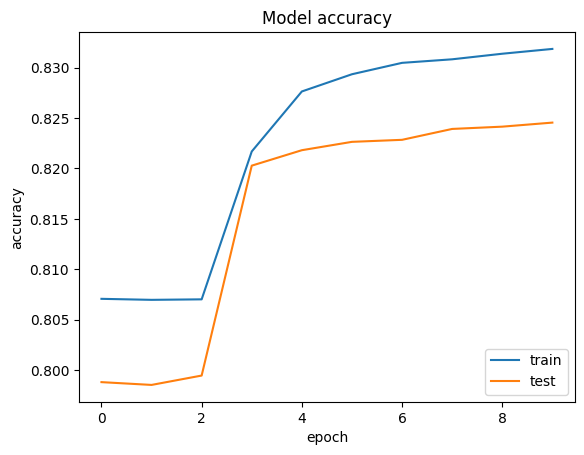

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers
# from sklearn.metrics import accuracy_score

In [ ]:
# X = new_df1[['event subtype','corr_diff']]
# y = new_df1['label_ml']

# X = np.array(X)
# y = np.array(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# input_shape = (X_train.shape[1], 1)  # Add an extra dimension for channels
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# X_train = X_train / 255.0
# X_test = X_test / 255.0

# X_train = X_train.astype('float32')
# y_train = y_train.astype('int32')

In [ ]:
# model = tf.keras.Sequential([
#     layers.Conv1D(32, 1, activation='relu', input_shape=input_shape),
#     layers.MaxPooling1D(2),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

In [ ]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=100, batch_size=32)

In [ ]:
# X_test = X_test.astype('float32')
# y_pred = model.predict(X_test)
# y_pred = y_pred.astype('float32')

# classes_x = np.argmax(y_pred, axis=1)
# y_test = y_test.reshape(-1)
# classes_x = classes_x.reshape(-1)

# accuracy = accuracy_score(y_test, classes_x)
# print("Accuracy:", accuracy)

# report = classification_report(y_test, classes_x)
# print(report)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

X = new_df1[['event subtype', 'corr_diff']]
y = new_df1['label_ml']

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_shape = (X_train.shape[1], 1)  # Add an extra dimension

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Apply normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = y_train.astype('int32')

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Reshape the data for the model
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Continue with model training using the resampled data
model = tf.keras.Sequential([
    layers.Conv1D(32, 1, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
983/983 [==============================] - 5s 4ms/step - loss: 0.6826 - acc: 0.5786 - val_loss: 0.6710 - val_acc: 0.8024
Epoch 2/10
983/983 [==============================] - 5s 5ms/step - loss: 0.6435 - acc: 0.6536 - val_loss: 0.5891 - val_acc: 0.8024
Epoch 3/10
983/983 [==============================] - 3s 3ms/step - loss: 0.6191 - acc: 0.6689 - val_loss: 0.5573 - val_acc: 0.8024
Epoch 4/10
983/983 [==============================] - 3s 4ms/step - loss: 0.6120 - acc: 0.6698 - val_loss: 0.6272 - val_acc: 0.8024
Epoch 5/10
983/983 [==============================] - 3s 3ms/step - loss: 0.6073 - acc: 0.6727 - val_loss: 0.5289 - val_acc: 0.8023
Epoch 6/10
983/983 [==============================] - 3s 3ms/step - loss: 0.6024 - acc: 0.6756 - val_loss: 0.5749 - val_acc: 0.8024
Epoch 7/10
983/983 [==============================] - 3s 3ms/step - loss: 0.6004 - acc: 0.6735 - val_loss: 0.5992 - val_acc: 0.8024
Epoch 8/10
983/983 [==============================] - 3s 4ms/step - loss: 0.

In [ ]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
y_pred_classes_int = y_pred_classes.astype(int)

class_counts = np.bincount(y_train_resampled)
print("Class_counts",class_counts)

# Classification report
target_names = ['Class 0', 'Class 1']
report = classification_report(y_test, y_pred_classes_int, target_names=target_names)
print(report)

623/623 [==============================] - 1s 1ms/step
Class_counts [15715 15715]
              precision    recall  f1-score   support

     Class 0       0.49      0.46      0.48      3887
     Class 1       0.87      0.88      0.88     16029

    accuracy                           0.80     19916
   macro avg       0.68      0.67      0.68     19916
weighted avg       0.80      0.80      0.80     19916



In [ ]:
y_pred_classes_int = y_pred_classes.astype(int)
print(y_pred_classes_int)

[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
unique_values = np.unique(y_pred_classes_int)

print(unique_values)

[0]


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve

# Assuming you have the following variables:
# y_true: the true class labels for the test set
# y_pred: an array of probability predictions from the CNN

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Find the optimal threshold that maximizes the true positive rate and minimizes the false positive rate
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.60183233


In [ ]:
#DistSleepDay2

import pandas as pd
import numpy as np

def get_most_common_prediction(y_pred):
    unique_values, counts = np.unique(y_pred, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_prediction = unique_values[most_common_index]
    class_counts = dict(zip(unique_values, counts))
    return most_common_prediction, class_counts

# Read the DataFrames
dfh1 = pd.read_excel('/content/dfh1new.xlsx')
dfh2 = pd.read_excel('/content/dfh2new.xlsx')
dfh3 = pd.read_excel('/content/dfh3new.xlsx')
dfh4 = pd.read_excel('/content/dfh4new.xlsx')
dfh5 = pd.read_excel('/content/dfh5new.xlsx')
dfh6 = pd.read_excel('/content/dfh6new.xlsx')
dfh7 = pd.read_excel('/content/dfh7new.xlsx')
dfh8 = pd.read_excel('/content/dfh8new.xlsx')

dfh1 = dfh1[['event subtype', 'corr_diff']].dropna()
dfh2 = dfh2[['event subtype', 'corr_diff']].dropna()
dfh3 = dfh3[['event subtype', 'corr_diff']].dropna()
dfh4 = dfh4[['event subtype', 'corr_diff']].dropna()
dfh5 = dfh5[['event subtype', 'corr_diff']].dropna()
dfh6 = dfh6[['event subtype', 'corr_diff']].dropna()
dfh7 = dfh7[['event subtype', 'corr_diff']].dropna()
dfh8 = dfh8[['event subtype', 'corr_diff']].dropna()

# Create a list to store the outputs
outputs = []
class_counts_list = []

# Perform prediction for each DataFrame
for dfh in [dfh1, dfh2, dfh3, dfh4, dfh5, dfh6, dfh7, dfh8]:
    # Assuming you have prepared the features for each DataFrame
    X_test = dfh  # Adjust this according to your DataFrame structure

    # Perform the prediction
    y_pred = model.predict(X_test)
    y_pred_classes = np.where(y_pred >=  0.5 , 1, 0)

    # Get the most common prediction and class counts
    most_common_prediction, class_counts = get_most_common_prediction(y_pred_classes)

    # Append the output to the list
    outputs.append((most_common_prediction))
    class_counts_list.append(class_counts)

# Convert the outputs list to an array
outputs_array = np.array(outputs)
class_counts_array = np.array(class_counts_list)

# Print the array of outputs
print(outputs_array)

# Print class_counts for each class
for i, class_counts in enumerate(class_counts_array):
    print(f"Class counts for prediction {outputs_array[i]}:")
    for cls, count in class_counts.items():
        print(f"Class {cls}: {count}")
    print()

815/815 [==============================] - 1s 2ms/step
[1 1 1 1 1 1 1 1]
Class counts for prediction 1:
Class 0: 38
Class 1: 4144

Class counts for prediction 1:
Class 0: 43
Class 1: 9764

Class counts for prediction 1:
Class 0: 23
Class 1: 3624

Class counts for prediction 1:
Class 0: 38
Class 1: 21459

Class counts for prediction 1:
Class 0: 19
Class 1: 3617

Class counts for prediction 1:
Class 0: 41
Class 1: 20019

Class counts for prediction 1:
Class 0: 20
Class 1: 4559

Class counts for prediction 1:
Class 0: 49
Class 1: 26011



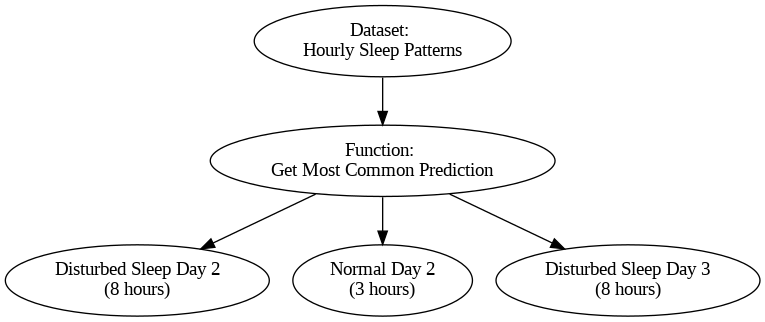

In [ ]:
import graphviz
from IPython.display import Image, display

# Create the graph
graph = graphviz.Digraph(format='png')

# Add nodes
graph.node('Function', 'Function: \nGet Most Common Prediction')
graph.node('Dataset', 'Dataset: \nHourly Sleep Patterns')
graph.node('Disturbed Sleep Day 2', 'Disturbed Sleep Day 2\n(8 hours)')
graph.node('Normal Day 2', 'Normal Day 2\n(3 hours)')
graph.node('Disturbed Sleep Day 3', 'Disturbed Sleep Day 3\n(8 hours)')

# Add edges
graph.edge('Dataset', 'Function')
graph.edge('Function', 'Disturbed Sleep Day 2')
graph.edge('Function', 'Normal Day 2')
graph.edge('Function', 'Disturbed Sleep Day 3')

# Save and render the graph
graph.render('sleep_state_predictions', view=False)

# Display the graph
display(Image(filename='sleep_state_predictions.png'))
